In [32]:
import pandas as pd
# import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

In [33]:
tickerList = []
tickerData = {}

# Gets all the csv files in stockData
files = glob.glob("stockData/*.csv")

# Loops through and stores tickers into dataframe, and reads each file
for file in files:
    # Storing ticker name in tickerList
    ticker = file.split("/")[-1].split("_")[0]
    tickerList.append(ticker)

    # Reading the csv file into a dataframe and storing it in tickerData
    df = pd.read_csv(file)
    tickerData[ticker] = df

print(len(tickerList))

505


In [34]:
# --- Random Fun Test code ---
stockNum = rand.randint(0, 504)
randomStock = tickerList[stockNum]

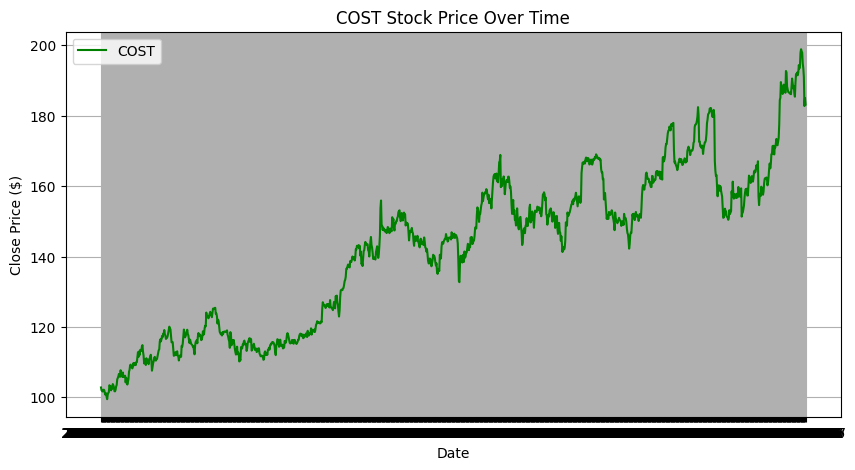

In [35]:
# Stock plotting
Graphcolor = 'red'

if tickerData[randomStock]['open'].iloc[0] < tickerData[randomStock]['open'].iloc[-1]:
    Graphcolor = 'green'


plt.figure(figsize=(10, 5))
plt.plot(tickerData[randomStock]["date"], tickerData[randomStock]["close"], label=randomStock, color = Graphcolor)
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.title(f"{randomStock} Stock Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
### ADD MORE CODE HERE FOR ANALYSIS OR TESTING

Baseline -- All stock index fund

In [41]:
firstOpen = lastOpen = 0

for stock in tickerList:
    df = tickerData[stock]
    if pd.notna(df['open'].iloc[0]) and pd.notna(df['open'].iloc[-1]):
        firstOpen += df['open'].iloc[0]
        lastOpen += df['open'].iloc[-1]

if firstOpen == 0:
    print("firstOpen is zero, cannot divide.")
else:
    print((lastOpen / firstOpen) * 100)

185.03827269206127


Strategy #1 -- Buying stocks post crash

---


In [38]:
# number of stocks that crashed over x% in a given time period O(N * M)
percent = 0.4
crashLength = 30
crashCounter = {}

for ticker in tickerList:
    df = tickerData[ticker]
    
    # 2 pointer approach
    x = y = 0

    while x < len(df):
        if df.iloc[x]['open'] < (df.iloc[y]['open'] * (1 - percent)):
            if ticker not in crashCounter:
                crashCounter[ticker] = 0
            crashCounter[ticker] += 1
            y = x

        if x - y > crashLength:
            y += 1
        else:
            if x + 1 > len(df):
                break
            x += 1

# Lists for Crashed Stocks:
twentyPercentCrashed = ['BA', 'CELG', 'XEC', 'GWW', 'EQIX', 'ESS', 'URI', 'GOOGL', 'TDG', 'AMZN', 'FDX', 'CMG', 'ADS', 'NI', 'ZBH', 'PCLN', 'CXO', 'LYB', 'TRIP', 'BAX', 'HUM', 'MTD', 'DISCK', 'EBAY', 'PSA', 'AAPL', 'AVGO', 'CHTR', 'INCY', 'SHW', 'ANDV', 'MCK', 'NFLX', 'ORLY', 'GOOG', 'WHR', 'ULTA', 'REGN', 'FFIV', 'EXPE', 'AZO', 'AMG', 'PRGO', 'AGN', 'IBM', 'SRCL', 'AAP', 'YUM', 'SPG', 'RL', 'QRVO', 'ALGN', 'WYNN', 'ILMN', 'PXD', 'DISCA', 'SNA', 'SIG', 'SLG', 'BLK', 'AMGN', 'VRTX', 'APA', 'AMP', 'EFX', 'RE', 'AYI', 'MLM', 'SWKS', 'BIIB', 'ALXN', 'CI', 'EW', 'COST', 'MHK', 'GS', 'COO', 'ISRG', 'RCL', 'ROP']
thirtyPercentCrashed = ['GS', 'AMGN', 'REGN', 'AZO', 'MHK', 'ISRG', 'SIG', 'NFLX', 'MCK', 'SNA', 'AVGO', 'ROP', 'RL', 'SRCL', 'COST', 'AMG', 'PCLN', 'TRIP', 'PSA', 'GOOG', 'QRVO', 'CI', 'CHTR', 'TDG', 'BIIB', 'PRGO', 'ZBH', 'NI', 'EW', 'COO', 'MTD', 'ILMN', 'XEC', 'ANDV', 'CELG', 'INCY', 'EBAY', 'CMG', 'SPG', 'ULTA', 'GWW', 'IBM', 'RE', 'AAPL', 'SHW', 'EQIX', 'ADS', 'VRTX', 'APA', 'AMP', 'BA', 'FFIV', 'EFX', 'ESS', 'ALGN', 'AYI', 'LYB', 'HUM', 'BAX', 'SWKS', 'SLG', 'ALXN', 'FDX', 'DISCA', 'EXPE', 'PXD', 'GOOGL', 'CXO', 'WYNN', 'WHR', 'DISCK', 'MLM', 'BLK', 'YUM', 'AGN', 'URI', 'AMZN', 'RCL', 'AAP', 'ORLY']
fourtyPercentCrashed = ['APC', 'NRG', 'CHD', 'GPS', 'QRVO', 'EVHC', 'NI', 'MRO', 'OKE', 'NFX', 'INCY', 'EBAY', 'BBY', 'DVN', 'ARNC', 'AMD', 'KMI', 'MPC', 'FCX', 'BAX', 'WMB', 'DISCA', 'WYNN', 'DISCK', 'STX', 'CHK', 'NWL', 'URI']
  

print(f"Number of stocks that crashed over {percent * 100}% in {crashLength} days: {len(crashCounter)}")
        

Number of stocks that crashed over 40.0% in 30 days: 28


In [39]:
crashedStocks = [ticker for ticker, count in crashCounter.items() if count > 0]
print(crashedStocks)

['APC', 'NRG', 'CHD', 'GPS', 'QRVO', 'EVHC', 'NI', 'MRO', 'OKE', 'NFX', 'INCY', 'EBAY', 'BBY', 'DVN', 'ARNC', 'AMD', 'KMI', 'MPC', 'FCX', 'BAX', 'WMB', 'DISCA', 'WYNN', 'DISCK', 'STX', 'CHK', 'NWL', 'URI']


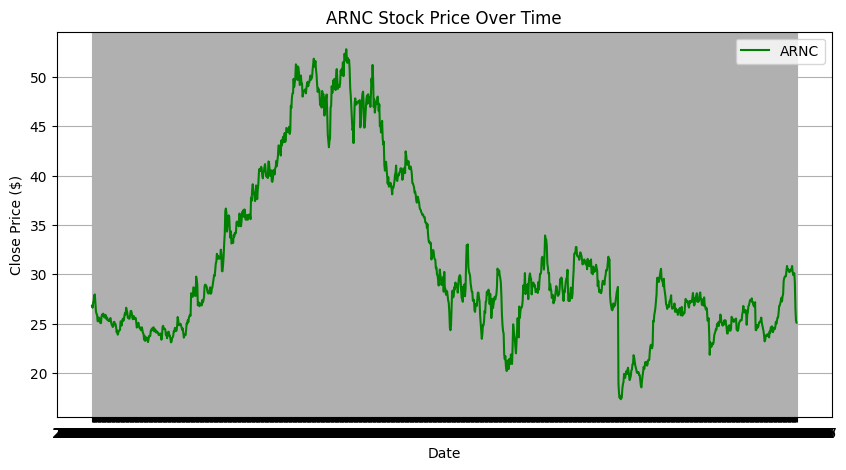

In [40]:
i = 14
stock = crashedStocks[i]

plt.figure(figsize=(10, 5))
plt.plot(tickerData[stock]["date"], tickerData[stock]["close"], label=stock, color = 'green')
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.title(f"{stock} Stock Price Over Time")
plt.legend()
plt.grid(True)
plt.show()